Accuracy:  0.9117647058823529 

Recall Score:  0.8620689655172413 

Precision Score:  0.9259259259259259 

F1 Score:  0.8928571428571429 

Specificity:  0.9487179487179487 

Confustion matrix:
 [[37  2]
 [ 4 25]] 



[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

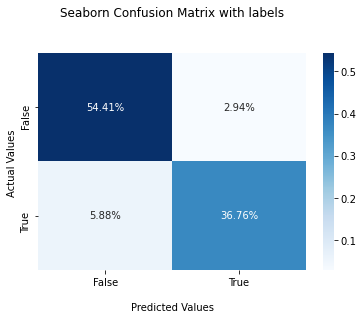

In [7]:
import pandas as pd
import numpy as np
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#import joblib
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

dataset = pd.read_csv('trainingDataset1week.csv')
X = dataset.drop(columns=['On/Off', 'Brightness (x*10)%', 'Color temp (x*1000)Kelvin']) #only has time
y = dataset.drop(columns=['Time', 'Brightness (x*10)%', 'Color temp (x*1000)Kelvin']) #only has on/off
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


model1 = ExtraTreeClassifier()
    # model2 = DecisionTreeClassifier()
model1.fit(X_train, y_train)
    # model2.fit(X, y)

prediction1 = model1.predict(X_test)
    # predictions2 = model2.predict([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12],[13],[14],[15],[16],[17],[18],[19],[20],[21],[22],[23]])

score = accuracy_score(y_test, prediction1)
print("Accuracy: ", score,"\n")

recallScore = recall_score(y_test, prediction1)
print ("Recall Score: ", recallScore,"\n")

precisionScore = precision_score(y_test, prediction1)
print ("Precision Score: ", precisionScore,"\n")

f1score = f1_score(y_test, prediction1)
print ("F1 Score: ", f1score,"\n")

tn, fp, fn, tp = confusion_matrix(y_test, prediction1).ravel()
specificity = tn / (tn+fp)
print("Specificity: ", specificity,"\n")

cf_matrix = confusion_matrix(y_test, prediction1)

print("Confustion matrix:\n", cf_matrix,"\n")


ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

Decision Tree: AUROC = 0.960 



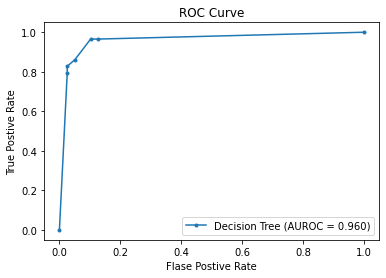

In [8]:
dt_probs = model1.predict_proba(X_test)
dt_probs = dt_probs[:,1]
dt_auc = roc_auc_score(y_test, dt_probs)
print("Decision Tree: AUROC = %.3f \n" %(dt_auc))

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
plt.plot(dt_fpr, dt_tpr, marker=".", label="Decision Tree (AUROC = %0.3f)" % dt_auc)
plt.title("ROC Curve")
plt.xlabel("Flase Postive Rate")
plt.ylabel("True Postive Rate")
plt.legend()
plt.show()

Accuracy:  0.8088235294117647 

Recall Score:  0.8088235294117647 

Precision Score:  0.8593557422969188 

F1 Score:  0.8138575244339222 

Confustion matrix:
 [[ 9  0  0  0  0  1  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0]
 [ 0  2  0 24  0  0  0  0]
 [ 0  0  2  1  6  1  1  0]
 [ 0  0  2  0  0  8  1  0]
 [ 0  0  0  0  0  1  4  0]
 [ 0  0  0  0  0  0  1  0]] 



C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


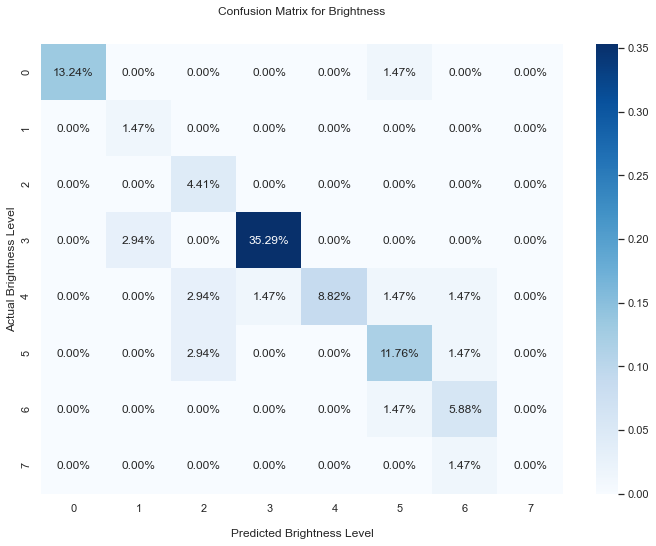

In [13]:
X = dataset.drop(columns=['On/Off', 'Brightness (x*10)%', 'Color temp (x*1000)Kelvin']) #only has time
y = dataset.drop(columns=['Time', 'On/Off', 'Color temp (x*1000)Kelvin']) #only has brightness
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


model1 = ExtraTreeClassifier()

model1.fit(X_train, y_train)

prediction1 = model1.predict(X_test)


score = accuracy_score(y_test, prediction1)
print("Accuracy: ", score,"\n")

recallScore = recall_score(y_test, prediction1, average="weighted")
print ("Recall Score: ", recallScore,"\n")

precisionScore = precision_score(y_test, prediction1, average="weighted")
print ("Precision Score: ", precisionScore,"\n")

f1score = f1_score(y_test, prediction1, average="weighted")
print ("F1 Score: ", f1score,"\n")

cf_matrix = confusion_matrix(y_test, prediction1)

print("Confustion matrix:\n", cf_matrix,"\n")

sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Brightness\n\n');
ax.set_xlabel('\nPredicted Brightness Level')
ax.set_ylabel('Actual Brightness Level');

Accuracy:  0.6176470588235294 

Recall Score:  0.6176470588235294 

Precision Score:  0.6125239569512014 

F1 Score:  0.5975147977743134 

Confustion matrix:
 [[ 4  0  0  0  0  0  0]
 [ 1 16  0  0  0  3  0]
 [ 0  0  2  0  0  0  0]
 [ 0  0  3  4  0  2  0]
 [ 1  1  6  3  0  0  0]
 [ 1  2  1  0  0  4  0]
 [ 2  0  0  0  0  0 12]] 



C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


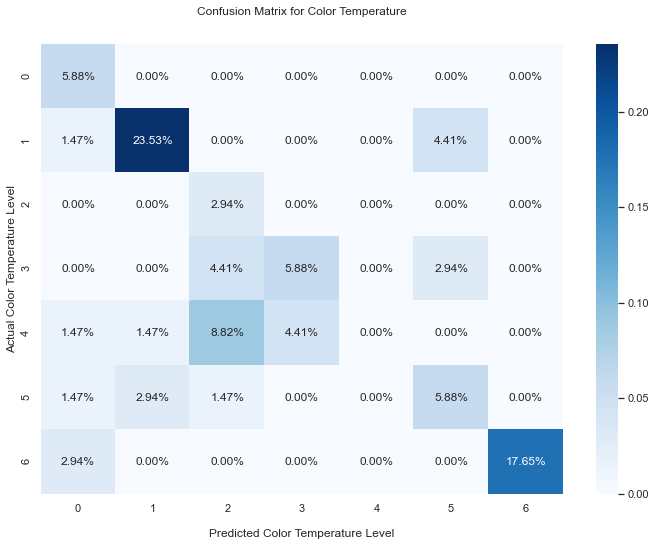

In [17]:
X = dataset.drop(columns=['On/Off', 'Brightness (x*10)%', 'Color temp (x*1000)Kelvin']) #only has time
y = dataset.drop(columns=['Time', 'On/Off', 'Brightness (x*10)%']) #only has color temperature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


model1 = ExtraTreeClassifier()

model1.fit(X_train, y_train)

prediction1 = model1.predict(X_test)


score = accuracy_score(y_test, prediction1)
print("Accuracy: ", score,"\n")

recallScore = recall_score(y_test, prediction1, average="weighted")
print ("Recall Score: ", recallScore,"\n")

precisionScore = precision_score(y_test, prediction1, average="weighted")
print ("Precision Score: ", precisionScore,"\n")

f1score = f1_score(y_test, prediction1, average="weighted")
print ("F1 Score: ", f1score,"\n")

cf_matrix = confusion_matrix(y_test, prediction1)

print("Confustion matrix:\n", cf_matrix,"\n")

sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Color Temperature\n\n');
ax.set_xlabel('\nPredicted Color Temperature Level')
ax.set_ylabel('Actual Color Temperature Level');